# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

## Generate the Cities List by Using the citipy Library

In [19]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


--- 
## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    lat = lats[i]
    lon = lngs[i]

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url.format(lat=lat, lon=lon, weather_api_key=weather_api_key)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
City not found. Skipping...
Processing Record 2 of Set 1 | port-aux-francais
City not found. Skipping...
Processing Record 3 of Set 1 | mukah
City not found. Skipping...
Processing Record 4 of Set 1 | howard springs
City not found. Skipping...
Processing Record 5 of Set 1 | kodiak
City not found. Skipping...
Processing Record 6 of Set 1 | puerto san jose
City not found. Skipping...
Processing Record 7 of Set 1 | adamstown
City not found. Skipping...
Processing Record 8 of Set 1 | nar'yan-mar
City not found. Skipping...
Processing Record 9 of Set 1 | as saffaniyah
Processing Record 10 of Set 1 | blackmans bay
City not found. Skipping...
Processing Record 11 of Set 1 | tual
City not found. Skipping...
Processing Record 12 of Set 1 | mount isa
Processing Record 13 of Set 1 | arraial do cabo
City not found. Skipping...
Processing Record 14 of Set 1 | edinburgh of the seven seas
City not found.

In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          155
Lat           155
Lng           155
Max Temp      155
Humidity      155
Cloudiness    155
Wind Speed    155
Country       155
Date          155
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,as saffaniyah,27.6570,49.2064,290.60,47,16,8.29,SA,1734481284
1,mount isa,-16.9244,139.8569,303.20,74,100,2.23,AU,1734481287
2,albany,53.9614,139.0659,251.39,91,68,2.87,RU,1734481294
3,aswan,18.6973,120.5448,298.59,75,100,14.13,PH,1734481301
4,port mathurin,23.9126,32.7297,289.29,31,83,4.99,EG,1734481305


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,as saffaniyah,27.6570,49.2064,290.60,47,16,8.29,SA,1734481284
1,mount isa,-16.9244,139.8569,303.20,74,100,2.23,AU,1734481287
2,albany,53.9614,139.0659,251.39,91,68,2.87,RU,1734481294
3,aswan,18.6973,120.5448,298.59,75,100,14.13,PH,1734481301
4,port mathurin,23.9126,32.7297,289.29,31,83,4.99,EG,1734481305


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

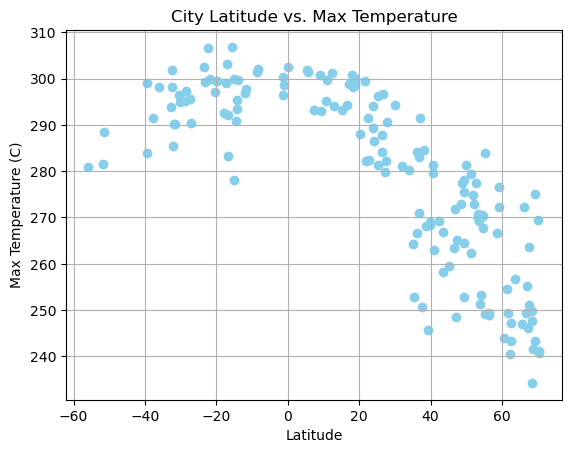

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color="skyblue", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

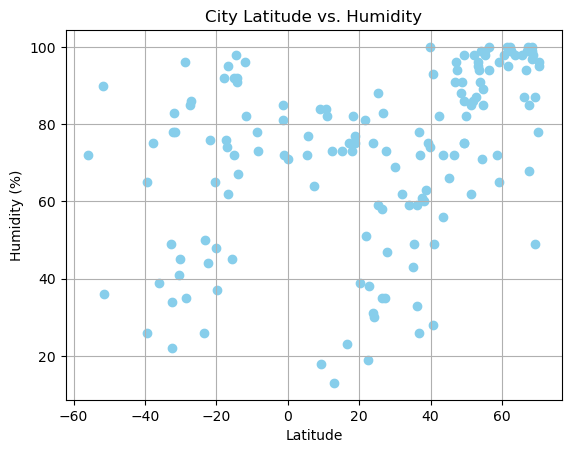

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color="skyblue", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

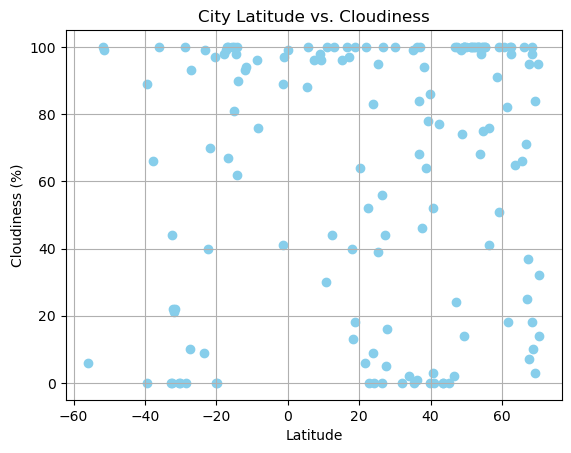

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="skyblue", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

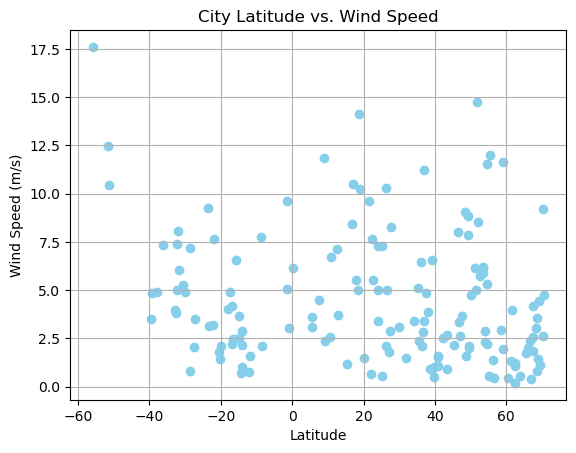

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color="skyblue", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [55]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, unique_id):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Print the r^2 value
    print(f"The r^2 value is: {rvalue}")
    
    # Calculate the regression values
    regress_values = x_values * slope + intercept
    
    # Create the equation of the line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    
    # Plot the data points
    plt.scatter(x_values, y_values, label='Data Points')
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-", label='Regression Line')
    
    # Annotate the line equation on the plot
    plt.annotate(line_eq, (min(x_values), max(y_values) * 0.9), fontsize=12, color="red")
    
    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'Linear Regression Plot of {x_label} vs. {y_label}')
    plt.legend()

    # Save the figure
    filename = f"output_data/linregress{unique_id}.png"
    plt.savefig(filename)

    plt.show()


In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,as saffaniyah,27.6570,49.2064,290.60,47,16,8.29,SA,1734481284
2,albany,53.9614,139.0659,251.39,91,68,2.87,RU,1734481294
3,aswan,18.6973,120.5448,298.59,75,100,14.13,PH,1734481301
4,port mathurin,23.9126,32.7297,289.29,31,83,4.99,EG,1734481305
5,usogorsk,46.8552,-82.7215,271.73,91,100,3.33,CA,1734481309


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mount isa,-16.9244,139.8569,303.20,74,100,2.23,AU,1734481287
8,ratnagiri,-8.3532,123.0219,302.00,73,76,2.12,ID,1734481326
9,iqaluit,-39.4934,-71.2745,284.03,65,0,3.50,AR,1734481328
13,hilo,-17.4213,-140.0377,299.08,76,99,4.92,PF,1734481350
19,malango,-36.1836,-59.7972,298.13,39,100,7.34,AR,1734481371


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: -0.8341206945915239


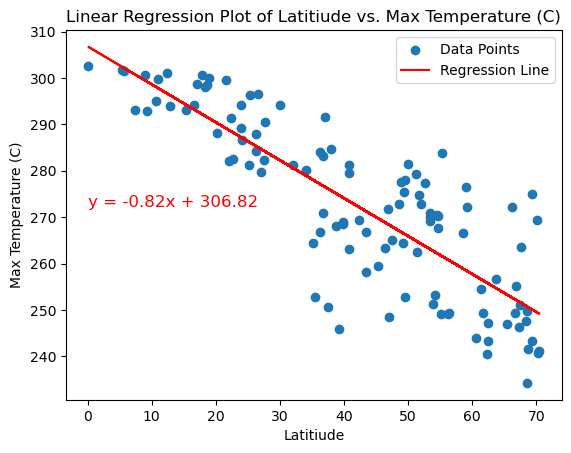

In [56]:
# Linear regression on Northern Hemisphere
# Call the function to create the linear regression plot

create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitiude", "Max Temperature (C)", "1")

The r^2 value is: 0.45953630212868307


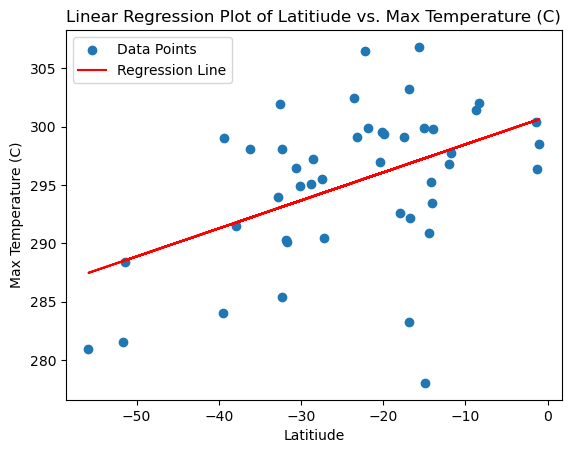

In [57]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitiude", "Max Temperature (C)", "2")

**Discussion about the linear relationship:**
- **Northern Hemisphere:**
The r^2 value for the linear regression of temperature versus latitude in the Northern Hemisphere is -0.834. This indicates a strong negative correlation between latitude and maximum temperature. As latitude increases (moving away from the equator toward the poles), the temperature decreases significantly. This is expected because the equator receives the most direct sunlight, which leads to higher temperatures, while the poles receive less direct sunlight, leading to cooler temperatures.

- **Southern Hemisphere:**
In the Southern Hemisphere, the r^2 value is 0.459, suggesting a moderate positive correlation between latitude and temperature. However, the correlation is not as strong as in the Northern Hemisphere. The data shows a slight trend where temperatures tend to be higher closer to the equator and lower as one moves toward the poles. This could be due to the seasonal differences in how the Southern Hemisphere receives solar radiation during different times of the year.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.5584019285592858


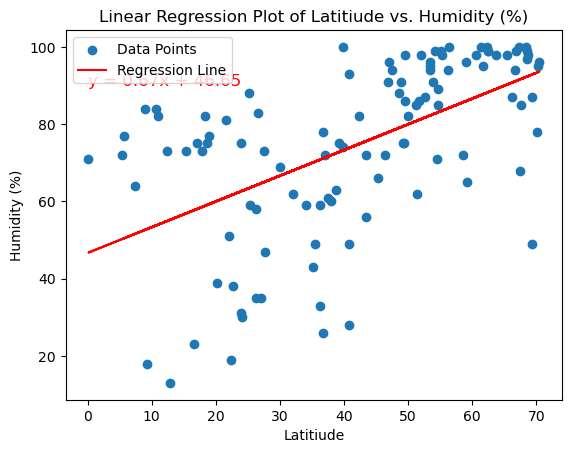

In [63]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitiude", "Humidity (%)", "3")

The r^2 value is: 0.34431510223121514


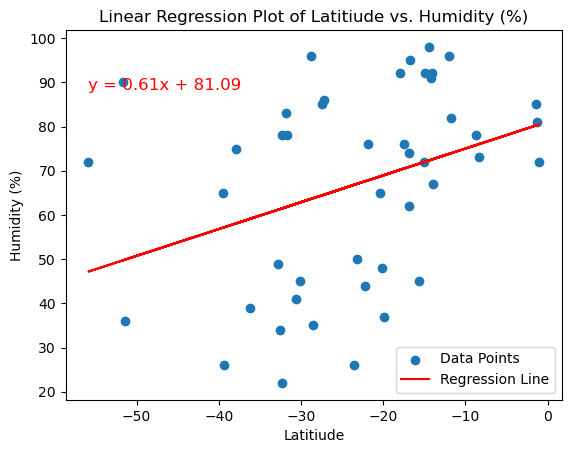

In [64]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitiude", "Humidity (%)", "4")

**Discussion about the linear relationship:**
- **Northern Hemisphere:**
The r^2 value for the linear regression of humidity versus latitude in the Northern Hemisphere is 0.558, which indicates a moderate positive correlation between humidity and latitude. As the latitude increases, particularly towards the tropics, humidity tends to rise. This is because regions near the equator, where temperatures are warmer, tend to have higher humidity levels due to increased evaporation from bodies of water.

- **Southern Hemisphere:**
In the Southern Hemisphere, the r^2 value is 0.344, suggesting a weaker correlation between latitude and humidity. While there is a positive trend, the relationship is not as clear-cut. This could be due to the complex factors that influence humidity, such as local weather patterns, the presence of large bodies of water, and geographical features like mountains.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.040925970491625975


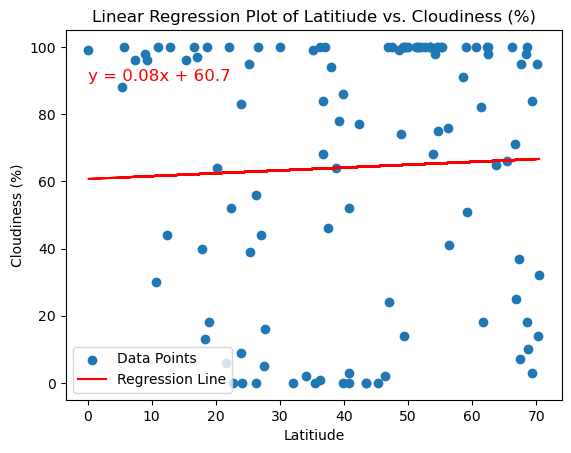

In [65]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitiude", "Cloudiness (%)", "5")

The r^2 value is: 0.3429617497794999


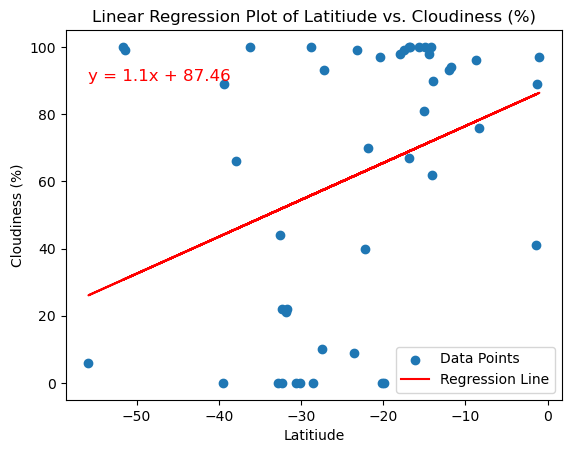

In [67]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitiude", "Cloudiness (%)", "6")

**Discussion about the linear relationship:**
- **Northern Hemisphere:** The r^2 value for the linear regression of cloudiness versus latitude in the Northern Hemisphere is 0.041, indicating a very weak positive correlation. Cloudiness does not seem to strongly correlate with latitude in this hemisphere. This suggests that factors other than latitude (such as local weather patterns, seasonal changes, and geographical features) have a more significant influence on cloud formation and cloud cover than latitude alone.

- **Southern Hemisphere:**
The r^2 value for the Southern Hemisphere is 0.343, which indicates a moderate positive correlation between cloudiness and latitude. This relationship may be influenced by weather systems like cyclones and the seasonal position of the Intertropical Convergence Zone (ITCZ), which is located near the equator and affects cloud cover patterns.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: -0.23956207925536321


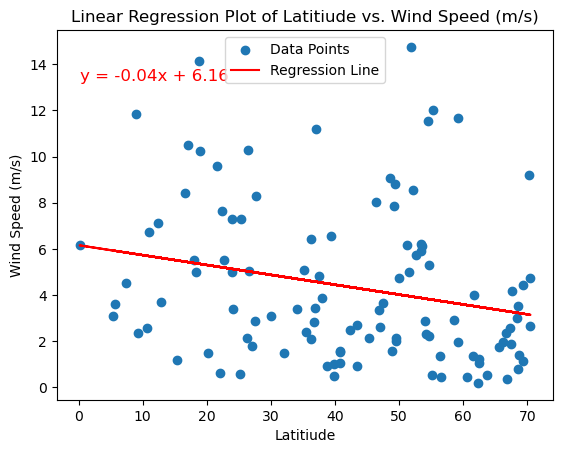

In [68]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitiude", "Wind Speed (m/s)", "7")

The r^2 value is: -0.5431769575547767


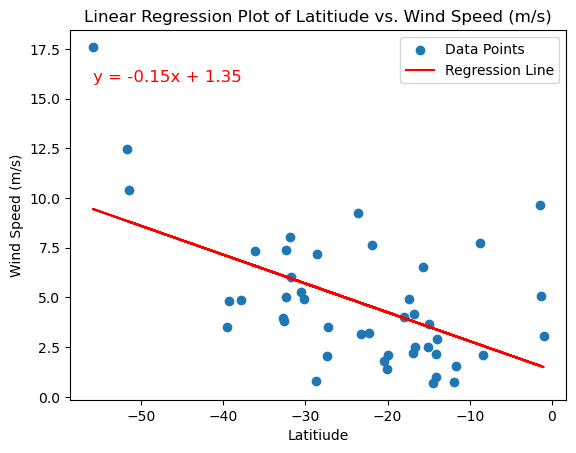

In [69]:
# Southern Hermisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitiude", "Wind Speed (m/s)", "8")

**Discussion about the linear relationship:**
 - **Northern Hemisphere:** The r^2 value for the linear regression of wind speed versus latitude in the Northern Hemisphere is -0.240, suggesting a very weak negative correlation. Wind speed is not strongly influenced by latitude in the Northern Hemisphere. This could imply that factors like local topography, atmospheric pressure systems, and other regional weather conditions play a more important role in determining wind speeds than latitude alone.

- **Southern Hemisphere:** The r^2 value for the Southern Hemisphere is -0.543, indicating a moderate negative correlation. As one moves away from the equator, wind speeds tend to increase. This could be due to the presence of larger, more consistent weather systems, such as the Westerlies and polar easterlies, which dominate the mid- and high-latitude regions of the Southern Hemisphere. These winds contribute to the observed increase in wind speed as latitude increases.